In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
print("✅ Library imported!")

df = pd.read_csv('dataset.csv', sep=';')

print(f"\n✅ Data loaded!")
print(f"   Shape: {df.shape}")  # (baris, kolom)
print(f"\n   Preview (3 baris pertama):")
print(df.head(3))



✅ Library imported!

✅ Data loaded!
   Shape: (5418, 43)

   Preview (3 baris pertama):
        0x       0y       1x       1y       2x       2y       3x       3y  \
0  449.429  643.857  327.271  587.170  265.731  484.233  246.689  362.602   
1  451.351  653.700  333.252  594.944  265.111  486.310  256.936  354.813   
2  457.565  692.363  335.312  635.283  267.992  518.501  261.948  388.552   

        4x       4y  ...      16y      17x      17y      18x      18y  \
0  231.657  252.290  ...  480.806  582.295  427.375  587.343  339.388   
1  248.984  239.251  ...  491.502  598.279  438.230  609.486  345.403   
2  264.993  288.713  ...  490.838  584.324  453.037  589.529  370.452   

       19x      19y      20x      20y  char  
0  547.296  415.208  536.242  454.387   NaN  
1  559.002  414.437  543.311  457.700     A  
2  548.982  435.461  536.997  465.605     A  

[3 rows x 43 columns]


In [ ]:
# Pisahkan kolom numerik dan label
numeric_cols = [col for col in df.columns if col != 'char']
label_col = 'char'

print(f"\n📌 Jumlah kolom numerik: {len(numeric_cols)}")
print(f"📌 Kolom label: {label_col}")

# 3.1 Cek Missing Values
print("\n--- Missing Values ---")
missing_total = df.isnull().sum().sum()
print(f"Total missing cells: {missing_total}")

if missing_total > 0:
    print("\nDetail per kolom:")
    missing_per_col = df.isnull().sum()
    for col, count in missing_per_col[missing_per_col > 0].items():
        print(f"  {col}: {count} missing")



📌 Jumlah kolom numerik: 42
📌 Kolom label: char

--- Missing Values ---
Total missing cells: 48

Detail per kolom:
  8y: 1 missing
  9x: 1 missing
  9y: 1 missing
  10x: 1 missing
  10y: 1 missing
  11x: 1 missing
  11y: 1 missing
  12x: 1 missing
  12y: 1 missing
  13x: 2 missing
  13y: 1 missing
  14x: 2 missing
  14y: 1 missing
  15x: 2 missing
  15y: 3 missing
  16x: 3 missing
  16y: 1 missing
  17x: 2 missing
  17y: 2 missing
  18x: 2 missing
  18y: 1 missing
  19x: 1 missing
  19y: 1 missing
  20x: 1 missing
  20y: 1 missing
  char: 13 missing


In [ ]:
# 3.2 Cek Outliers
print("\n--- Outliers ---")
print("Checking for extreme values (>700 or ==0)...")

outlier_count = 0
for col in numeric_cols:
    high = (df[col] > 700).sum()
    zero = (df[col] == 0).sum()
    outlier_count += high + zero

print(f"Total outlier values found: {outlier_count}")

# 3.3 Cek Duplicates
print("\n--- Duplicates ---")
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")


--- Outliers ---
Checking for extreme values (>700 or ==0)...
Total outlier values found: 5135

--- Duplicates ---
Duplicate rows: 4


In [ ]:
# Back up Data Asli
df_original = df.copy()
df_clean = df.copy()

print("✅ Backup created!")

✅ Backup created!


In [ ]:
# Cleaning
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

print("✅ All numeric columns converted!")


✅ All numeric columns converted!


In [ ]:
# Ngisi missing values
missing_before = df_clean[numeric_cols].isnull().sum().sum()
print(f"Missing values BEFORE: {missing_before}")

# Isi dengan MEDIAN (lebih aman dari outliers)
imputer = SimpleImputer(strategy='median')
df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])

missing_after = df_clean[numeric_cols].isnull().sum().sum()
print(f"Missing values AFTER: {missing_after}")
print(f"✅ Fixed {missing_before - missing_after} missing values!")

Missing values BEFORE: 35
Missing values AFTER: 0
✅ Fixed 35 missing values!


In [ ]:
# Handle outliers
print("Replacing outliers (>700 or ==0) with MEDIAN...\n")

outliers_fixed = 0

for col in numeric_cols:
    # Deteksi outlier
    is_outlier = (df_clean[col] > 700) | (df_clean[col] == 0)
    n_outliers = is_outlier.sum()

    if n_outliers > 0:
        # Replace dengan median
        median_val = df_clean[col].median()
        df_clean.loc[is_outlier, col] = median_val
        outliers_fixed += n_outliers

        # Print progress (hanya 5 kolom pertama)
        if outliers_fixed <= 100:
            print(f"  {col}: {n_outliers} outliers → {median_val:.2f}")

print(f"\n✅ Total {outliers_fixed} outliers replaced!")


Replacing outliers (>700 or ==0) with MEDIAN...

  0x: 13 outliers → 450.33
  0y: 38 outliers → 465.52
  1x: 17 outliers → 414.07
  1y: 27 outliers → 435.96

✅ Total 5135 outliers replaced!


In [ ]:
# Remove duplicates
duplicates_before = df_clean.duplicated().sum()
print(f"Duplicates BEFORE: {duplicates_before}")

df_clean = df_clean.drop_duplicates()
df_clean = df_clean.reset_index(drop=True)

duplicates_after = df_clean.duplicated().sum()
print(f"Duplicates AFTER: {duplicates_after}")
print(f"✅ Removed {duplicates_before - duplicates_after} duplicates!")

Duplicates BEFORE: 4
Duplicates AFTER: 0
✅ Removed 4 duplicates!


In [ ]:
# Validation
print(f"""
╔═══════════════════════════════════════════════════╗
║         CLEANING RESULTS SUMMARY                  ║
╠═══════════════════════════════════════════════════╣
║  1. SHAPE:                                        ║
║     Before: {df_original.shape[0]:5d} rows × {df_original.shape[1]:2d} cols                     ║
║     After:  {df_clean.shape[0]:5d} rows × {df_clean.shape[1]:2d} cols                     ║
║     Removed: {df_original.shape[0] - df_clean.shape[0]:4d} rows                            ║
║                                                   ║
║  2. MISSING VALUES:                               ║
║     Before: {df_original.isnull().sum().sum():5d} cells                          ║
║     After:  {df_clean[numeric_cols].isnull().sum().sum():5d} cells                          ║
║                                                   ║
║  3. OUTLIERS (>700 or ==0):                       ║
║     Before: {outlier_count:5d} values                        ║
║     After:  {((df_clean[numeric_cols] > 700) | (df_clean[numeric_cols] == 0)).sum().sum():5d} values                        ║
║                                                   ║
║  4. DUPLICATES:                                   ║
║     Before: {duplicates_before:5d} rows                          ║
║     After:  {df_clean.duplicated().sum():5d} rows                          ║
╚═══════════════════════════════════════════════════╝
""")
print(f"\n✅ DATA QUALITY CHECK:")
print(f"   Min value: {df_clean[numeric_cols].min().min():.1f}")
print(f"   Max value: {df_clean[numeric_cols].max().max():.2f}")
print(f"   Mean: {df_clean[numeric_cols].mean().mean():.2f}")



╔═══════════════════════════════════════════════════╗
║         CLEANING RESULTS SUMMARY                  ║
╠═══════════════════════════════════════════════════╣
║  1. SHAPE:                                        ║
║     Before:  5418 rows × 43 cols                     ║
║     After:   5414 rows × 43 cols                     ║
║     Removed:    4 rows                            ║
║                                                   ║
║  2. MISSING VALUES:                               ║
║     Before:    48 cells                          ║
║     After:      0 cells                          ║
║                                                   ║
║  3. OUTLIERS (>700 or ==0):                       ║
║     Before:  5135 values                        ║
║     After:      0 values                        ║
║                                                   ║
║  4. DUPLICATES:                                   ║
║     Before:     4 rows                          ║
║     After:      0 rows     


✅ Visualization saved: cleaning_visualization.png


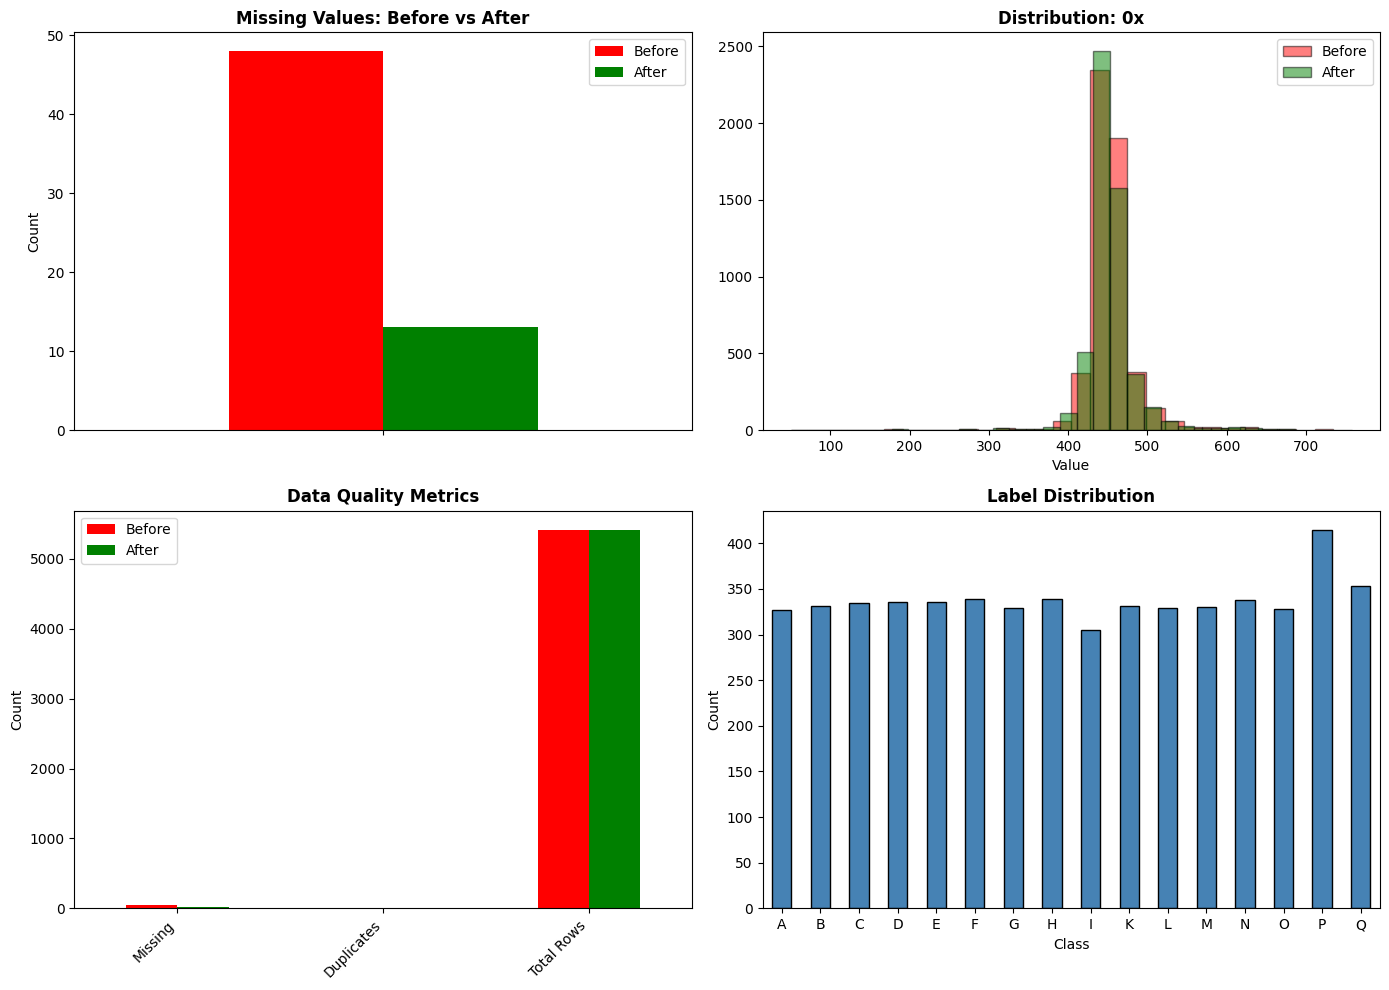

In [ ]:
# Visualisasi
#Plot comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Missing values
ax1 = axes[0, 0]
missing_data = pd.DataFrame({
    'Before': [df_original.isnull().sum().sum()],
    'After': [df_clean.isnull().sum().sum()]
})
missing_data.plot(kind='bar', ax=ax1, color=['red', 'green'])
ax1.set_title('Missing Values: Before vs After', fontweight='bold')
ax1.set_ylabel('Count')
ax1.set_xticklabels([''])

# Plot 2: Distribution (sample column)
ax2 = axes[0, 1]
sample_col = numeric_cols[0]
ax2.hist(df_original[sample_col].dropna(), bins=30, alpha=0.5,
         color='red', label='Before', edgecolor='black')
ax2.hist(df_clean[sample_col], bins=30, alpha=0.5,
         color='green', label='After', edgecolor='black')
ax2.set_title(f'Distribution: {sample_col}', fontweight='bold')
ax2.set_xlabel('Value')
ax2.legend()

# Plot 3: Stats summary
ax3 = axes[1, 0]
stats = pd.DataFrame({
    'Before': [
        df_original.isnull().sum().sum(),
        duplicates_before,
        len(df_original)
    ],
    'After': [
        df_clean.isnull().sum().sum(),
        0,
        len(df_clean)
    ]
}, index=['Missing', 'Duplicates', 'Total Rows'])
stats.plot(kind='bar', ax=ax3, color=['red', 'green'])
ax3.set_title('Data Quality Metrics', fontweight='bold')
ax3.set_ylabel('Count')
ax3.set_xticklabels(stats.index, rotation=45, ha='right')

# Plot 4: Label distribution
ax4 = axes[1, 1]
label_counts = df_clean['char'].value_counts().sort_index()
label_counts.plot(kind='bar', ax=ax4, color='steelblue', edgecolor='black')
ax4.set_title('Label Distribution', fontweight='bold')
ax4.set_xlabel('Class')
ax4.set_ylabel('Count')
ax4.set_xticklabels(label_counts.index, rotation=0)

plt.tight_layout()
plt.savefig('cleaning_visualization.png', dpi=300, bbox_inches='tight')
print("\n✅ Visualization saved: cleaning_visualization.png")


In [ ]:
# Save Data yang bersih
# Simpan dengan separator koma (standar)
df_clean.to_csv('dataset_cleaned.csv', index=False)
print("✅ Cleaned data saved: dataset_cleaned.csv")

# Simpan juga dengan separator semicolon (kalau perlu)
df_clean.to_csv('dataset_cleaned_semicolon.csv', index=False, sep=';')
print("✅ Also saved: dataset_cleaned_semicolon.csv (with semicolon)")


✅ Cleaned data saved: dataset_cleaned.csv
✅ Also saved: dataset_cleaned_semicolon.csv (with semicolon)


In [ ]:
# Generate report
report = f"""
DATA CLEANING REPORT
{'='*60}

FILE INFO:
  Input file:  dataset.csv
  Output file: dataset_cleaned.csv

CLEANING SUMMARY:
  1. Shape:
     Before: {df_original.shape[0]} rows × {df_original.shape[1]} columns
     After:  {df_clean.shape[0]} rows × {df_clean.shape[1]} columns

  2. Missing Values:
     Found: {df_original.isnull().sum().sum()} cells
     Fixed: {df_original.isnull().sum().sum() - df_clean[numeric_cols].isnull().sum().sum()} cells
     Method: Median imputation

  3. Outliers:
     Found: {outlier_count} values (>700 or ==0)
     Fixed: {outliers_fixed} values
     Method: Replace with median

  4. Duplicates:
     Found: {duplicates_before} rows
     Removed: {duplicates_before - duplicates_after} rows

DATA QUALITY:
  ✓ No missing values in numeric columns
  ✓ No extreme outliers
  ✓ No duplicate rows
  ✓ All data types correct

STATISTICS:
  Min:  {df_clean[numeric_cols].min().min():.2f}
  Max:  {df_clean[numeric_cols].max().max():.2f}
  Mean: {df_clean[numeric_cols].mean().mean():.2f}
  Std:  {df_clean[numeric_cols].std().mean():.2f}

LABEL DISTRIBUTION:
{df_clean['char'].value_counts().sort_index().to_string()}

{'='*60}
Cleaning completed successfully!
Report generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
"""

print(report)

with open('cleaning_report.txt', 'w') as f:
    f.write(report)

print("\n✅ Report saved: cleaning_report.txt")



DATA CLEANING REPORT

FILE INFO:
  Input file:  dataset.csv
  Output file: dataset_cleaned.csv
  
CLEANING SUMMARY:
  1. Shape:
     Before: 5418 rows × 43 columns
     After:  5414 rows × 43 columns
     
  2. Missing Values:
     Found: 48 cells
     Fixed: 48 cells
     Method: Median imputation
     
  3. Outliers:
     Found: 5135 values (>700 or ==0)
     Fixed: 5135 values
     Method: Replace with median
     
  4. Duplicates:
     Found: 4 rows
     Removed: 4 rows

DATA QUALITY:
  ✓ No missing values in numeric columns
  ✓ No extreme outliers
  ✓ No duplicate rows
  ✓ All data types correct
  
STATISTICS:
  Min:  -193.44
  Max:  700.00
  Mean: 419.52
  Std:  97.82

LABEL DISTRIBUTION:
char
A    327
B    331
C    335
D    336
E    336
F    339
G    329
H    339
I    305
K    331
L    329
M    330
N    338
O    328
P    415
Q    353

Cleaning completed successfully!
Report generated: 2026-02-10 10:59:32


✅ Report saved: cleaning_report.txt
